In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras import models, layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import random
import os
from keras.models import Model
import cv2 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [3]:
df= pd.read_csv("C:\\Users\\User\\Desktop\\smartthon\\dataset\\train.csv",sep=',',encoding='utf-8')

In [6]:
df.head()

,class,image_path,name,xmax,xmin,ymax,ymin
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0


In [7]:
df.tail()

,class,image_path,name,xmax,xmin,ymax,ymin
19945,4.0,081e7bb3832ec5bb25276db161a96274.jpg,CONSTRUCTION_ROAD,1025.0,600.0,408.0,148.0
19946,2.0,1ff38a7af7f13b1201d17c6e1829373a.jpg,POTHOLES,657.0,418.0,364.0,282.0
19947,2.0,1ff38a7af7f13b1201d17c6e1829373a.jpg,POTHOLES,507.0,338.0,436.0,283.0
19948,7.0,ac97490f13140fc1bfe613ec69301b34.jpg,BAD_BILLBOARD,956.0,713.0,110.0,25.0
19949,7.0,ac97490f13140fc1bfe613ec69301b34.jpg,BAD_BILLBOARD,814.0,674.0,148.0,71.0


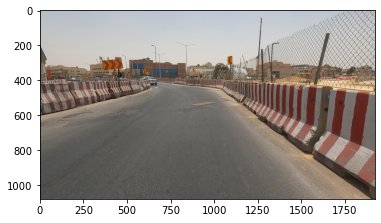

In [8]:
sample = random.choice(df['image_path'])
image = load_img("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+sample)
plt.imshow(image)

In [9]:
from PIL import Image 

image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+df['image_path'][0])
image = np.array(image)
len(image[0][0])

3

In [10]:
range(len(df))

range(0, 19950)

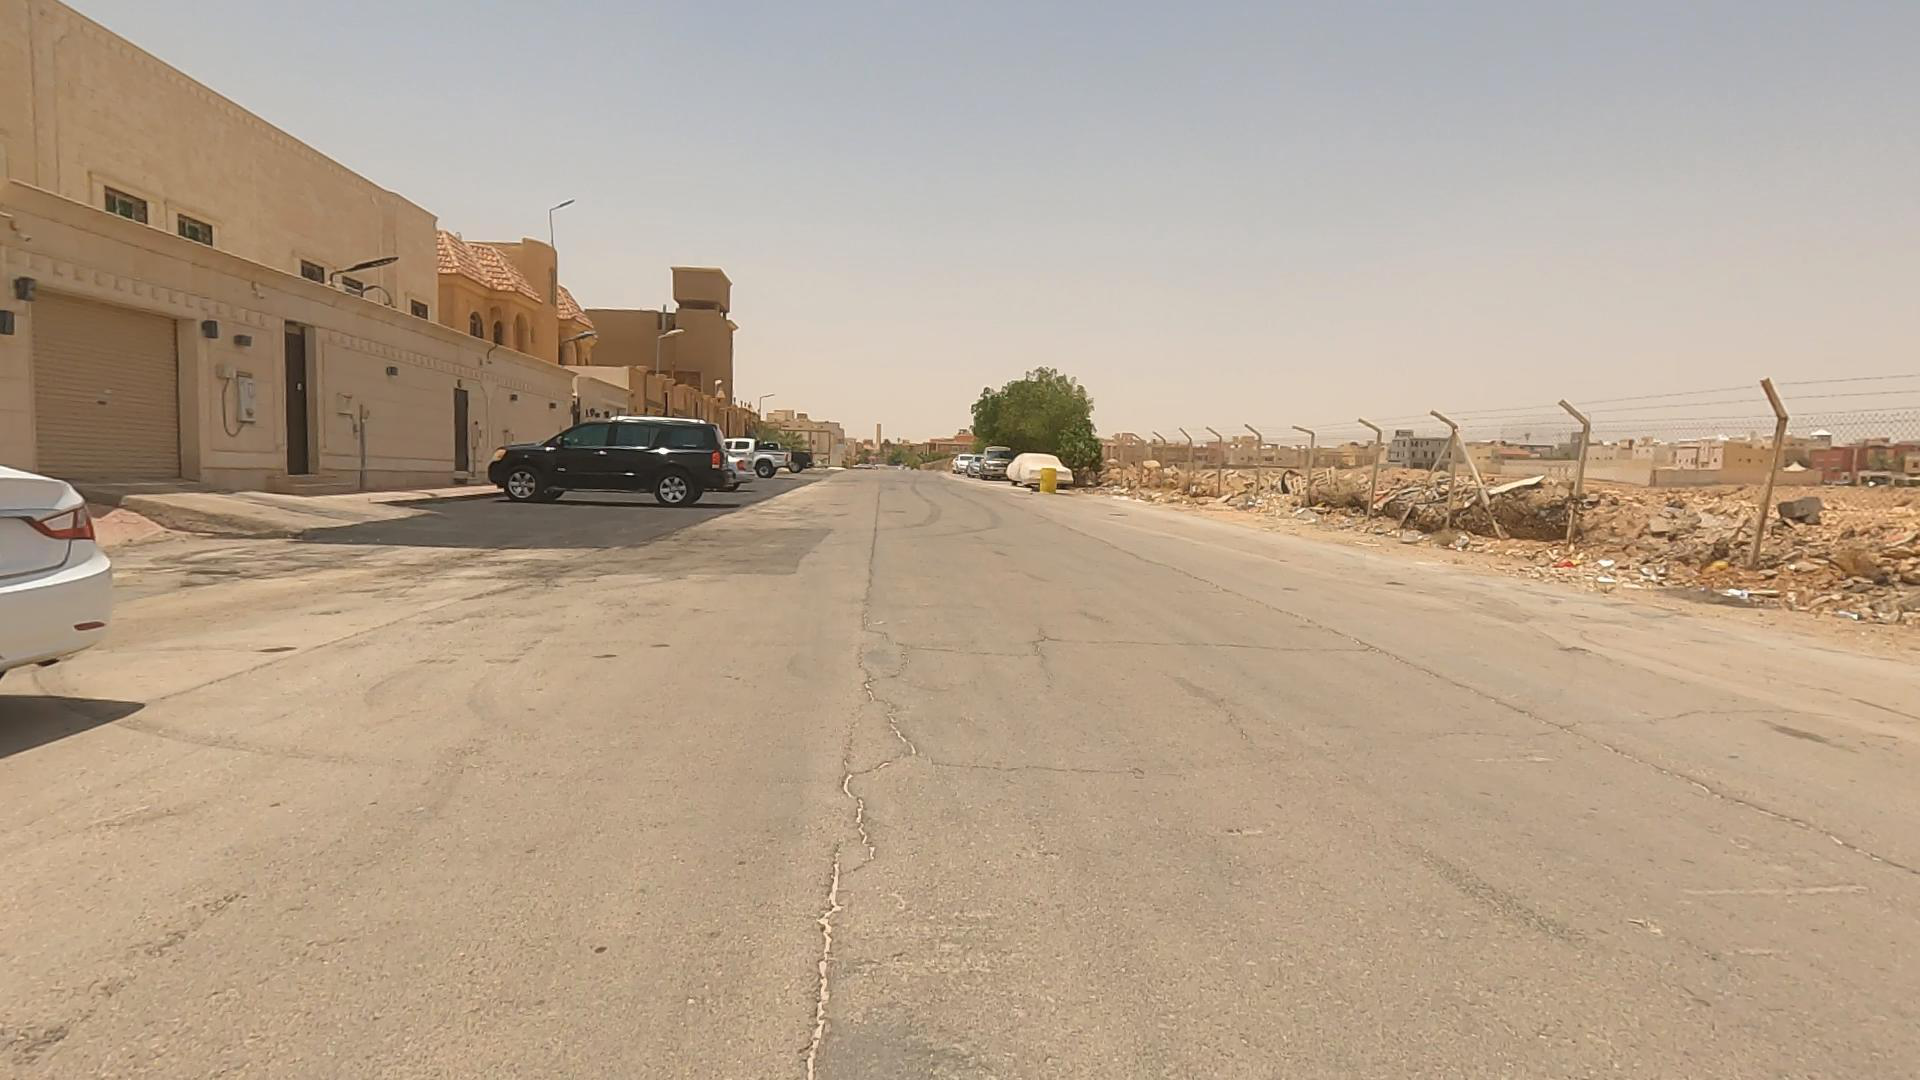

In [11]:
image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/4a48c42c9579ec0399e6c5a3e825e765.jpg")
image

In [12]:
grayscale = image.convert('L')

In [13]:
df['name'].value_counts()

GARBAGE              8597
CONSTRUCTION_ROAD    2730
POTHOLES             2625
CLUTTER_SIDEWALK     2253
BAD_BILLBOARD        1555
GRAFFITI             1124
SAND_ON_ROAD          748
UNKEPT_FACADE         127
FADED_SIGNAGE         107
BROKEN_SIGNAGE         83
BAD_STREETLIGHT         1
Name: name, dtype: int64

## gray image

In [4]:
df

,class,image_path,name,xmax,xmin,ymax,ymin
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0
...,...,...,...,...,...,...,...
19945,4.0,081e7bb3832ec5bb25276db161a96274.jpg,CONSTRUCTION_ROAD,1025.0,600.0,408.0,148.0
19946,2.0,1ff38a7af7f13b1201d17c6e1829373a.jpg,POTHOLES,657.0,418.0,364.0,282.0
19947,2.0,1ff38a7af7f13b1201d17c6e1829373a.jpg,POTHOLES,507.0,338.0,436.0,283.0
19948,7.0,ac97490f13140fc1bfe613ec69301b34.jpg,BAD_BILLBOARD,956.0,713.0,110.0,25.0


In [5]:
df[df['name']=='BAD_STREETLIGHT']

,class,image_path,name,xmax,xmin,ymax,ymin
19353,6.0,53d3797457a0d2e3afe146e2f797e77e.jpg,BAD_STREETLIGHT,985.0,359.0,161.0,-47.0


In [16]:
df

,class,image_path,name,xmax,xmin,ymax,ymin
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0
...,...,...,...,...,...,...,...
19945,4.0,081e7bb3832ec5bb25276db161a96274.jpg,CONSTRUCTION_ROAD,1025.0,600.0,408.0,148.0
19946,2.0,1ff38a7af7f13b1201d17c6e1829373a.jpg,POTHOLES,657.0,418.0,364.0,282.0
19947,2.0,1ff38a7af7f13b1201d17c6e1829373a.jpg,POTHOLES,507.0,338.0,436.0,283.0
19948,7.0,ac97490f13140fc1bfe613ec69301b34.jpg,BAD_BILLBOARD,956.0,713.0,110.0,25.0


In [6]:
data_ran=np.random.permutation(len(df))
test_size=int(len(df)*0.20)
test_in=data_ran[:test_size]
train_in=data_ran[test_size:]
df_train = df.iloc[train_in]
df_test = df.iloc[test_in]

In [7]:
df_train[df_train['name']=='BAD_STREETLIGHT']

,class,image_path,name,xmax,xmin,ymax,ymin
19353,6.0,53d3797457a0d2e3afe146e2f797e77e.jpg,BAD_STREETLIGHT,985.0,359.0,161.0,-47.0


In [19]:
df_vali[df_vali['name']=='BAD_STREETLIGHT']

,class,image_path,name,xmax,xmin,ymax,ymin


In [77]:
df_test[df_test['name']=='BAD_STREETLIGHT']

,class,image_path,name,xmax,xmin,ymax,ymin


In [8]:
bad_image=df[df['name']=='BAD_STREETLIGHT']

In [9]:
bad_image['xmax'],bad_image['xmin'],bad_image['ymax'], bad_image['ymin'] =824 ,242 , 145,-30

C:\Users\User\AppData\Local\Temp\ipykernel_9064\2056422986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_image['xmax'],bad_image['xmin'],bad_image['ymax'], bad_image['ymin'] =824 ,242 , 145,-30


In [82]:
df_train

,class,image_path,name,xmax,xmin,ymax,ymin
12905,2.0,d90717d70a1d23e68374079b64791d69.jpg,POTHOLES,321.0,73.0,489.0,309.0
8807,7.0,51b48bcf202378a5937a4e711c52a7e2.jpg,BAD_BILLBOARD,897.0,841.0,234.0,195.0
1866,7.0,c93fa3d3c4659c746ab2f62a0be6d1a2.jpg,BAD_BILLBOARD,737.0,664.0,158.0,110.0
4486,9.0,2f62c7a1378047ddf1a1bdc1d3a17280.jpg,CLUTTER_SIDEWALK,477.0,-41.0,541.0,178.0
7802,3.0,331ab05e7ce1e3c333b2205d3d4cd46a.jpg,GARBAGE,176.0,62.0,235.0,191.0
...,...,...,...,...,...,...,...
4084,4.0,2ac966adb98e3f193a412b5dddd10299.jpg,CONSTRUCTION_ROAD,980.0,709.0,326.0,151.0
19309,8.0,0145ea8f1ea1ba492b5fc1ebe9273656.jpg,SAND_ON_ROAD,542.0,426.0,195.0,132.0
13437,7.0,e347a7157de6e60eb271dea3ac8ea59d.jpg,BAD_BILLBOARD,986.0,764.0,181.0,47.0
1081,3.0,f701a83fe46b0b73ec74b954410fda4d.jpg,GARBAGE,508.0,450.0,284.0,224.0


In [10]:
te= pd.DataFrame(bad_image.values,columns=bad_image.columns,index=[2993])

In [11]:
df_test=df_test.append(te)

C:\Users\User\AppData\Local\Temp\ipykernel_9064\801593046.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test=df_test.append(te)


In [12]:
bad_image['xmax'],bad_image['xmin'],bad_image['ymax'], bad_image['ymin'] =952 ,320 , 181,-20
te= pd.DataFrame(bad_image.values,columns=bad_image.columns,index=[15960])
df_train=df_train.append(te)

C:\Users\User\AppData\Local\Temp\ipykernel_9064\2598503835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_image['xmax'],bad_image['xmin'],bad_image['ymax'], bad_image['ymin'] =952 ,320 , 181,-20
C:\Users\User\AppData\Local\Temp\ipykernel_9064\2598503835.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train=df_train.append(te)


In [13]:
df_train=df_train.reset_index()
#df_vali=df_vali.reset_index()
df_test= df_test.reset_index()

In [14]:
df_test.drop('index',axis=1,inplace=True)
df_train.drop('index',axis=1,inplace=True)
#df_vali.drop('index',axis=1,inplace=True)

In [15]:
df_train[df_train['name']=='BAD_STREETLIGHT']

,class,image_path,name,xmax,xmin,ymax,ymin
10201,6.0,53d3797457a0d2e3afe146e2f797e77e.jpg,BAD_STREETLIGHT,985.0,359.0,161.0,-47.0
15960,6.0,53d3797457a0d2e3afe146e2f797e77e.jpg,BAD_STREETLIGHT,952,320,181,-20


In [17]:
#df_vali[df_vali['name']=='BAD_STREETLIGHT']

In [18]:
df_test[df_test['name']=='BAD_STREETLIGHT']

,class,image_path,name,xmax,xmin,ymax,ymin
3990,6.0,53d3797457a0d2e3afe146e2f797e77e.jpg,BAD_STREETLIGHT,824,242,145,-30


In [32]:
df_train['name'].value_counts()

GARBAGE              6070
CONSTRUCTION_ROAD    1911
POTHOLES             1780
CLUTTER_SIDEWALK     1593
BAD_BILLBOARD        1069
GRAFFITI              790
SAND_ON_ROAD          515
UNKEPT_FACADE          90
FADED_SIGNAGE          81
BROKEN_SIGNAGE         65
BAD_STREETLIGHT         1
Name: name, dtype: int64

In [33]:
df_test.name.value_counts()

GARBAGE              1274
CONSTRUCTION_ROAD     415
POTHOLES              413
CLUTTER_SIDEWALK      309
BAD_BILLBOARD         245
GRAFFITI              169
SAND_ON_ROAD          129
UNKEPT_FACADE          19
FADED_SIGNAGE          11
BROKEN_SIGNAGE          8
BAD_STREETLIGHT         1
Name: name, dtype: int64

In [34]:
df_vali.name.value_counts()

GARBAGE              1253
POTHOLES              432
CONSTRUCTION_ROAD     404
CLUTTER_SIDEWALK      351
BAD_BILLBOARD         241
GRAFFITI              165
SAND_ON_ROAD          104
UNKEPT_FACADE          18
FADED_SIGNAGE          15
BROKEN_SIGNAGE         10
BAD_STREETLIGHT         1
Name: name, dtype: int64

In [35]:
df.image_path.value_counts()

291d3a6d38674da0e4b05135008bceb1.jpg    22
8b3335738dc291770ffb3613810128f4.jpg    19
fec90b848c9b6c4bcc1ec562597c55d8.jpg    19
0a2bc0dc2371794509f4b776aff0dd88.jpg    19
270c3a56f6a9abef21d61aec1eb53e88.jpg    19
                                        ..
1596246bbf778e2120656ca0eb5c2272.jpg     1
1726f638d4df5e9140ee7a691d155220.jpg     1
fcdf201c3cbe3543809d35eed38e2e40.jpg     1
320c8cc65946b84f11348cfb24496fd8.jpg     1
4688a6fd763942a56f0ae6510393a932.jpg     1
Name: image_path, Length: 7874, dtype: int64

In [36]:
df_test.image_path.value_counts()

622befe6a3f136ca242b6dc3d2dc43e4.jpg    5
e0aa6da6ff03c122b21d38845c281982.jpg    5
83262482e3c3e651116808d92e1de3e5.jpg    5
ba5140dca64807a7be6c57c82ef59167.jpg    4
8b3335738dc291770ffb3613810128f4.jpg    4
                                       ..
e8e8bc344ed26fe94e69a68fe92aa44f.jpg    1
4336d5e2a2c60f685e5f873977993bbc.jpg    1
08fc4f0f3315eff2f7b0dd0e62d9c4a6.jpg    1
7ad46ee27839b1a7906d8454438400ea.jpg    1
53d3797457a0d2e3afe146e2f797e77e.jpg    1
Name: image_path, Length: 2454, dtype: int64

In [37]:
7874+2092

9966

In [48]:
df_train['xmin']

0        513.0
1        338.0
2        108.0
3        730.0
4        -12.0
         ...  
13960    -58.0
13961    312.0
13962    159.0
13963    386.0
13964    424.0
Name: xmin, Length: 13965, dtype: float64

In [19]:
from PIL import Image 

x_train_gray=[]
y_train_gray=[]
for filename in range(len(df_train)):
    image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+df_train['image_path'][filename])
    grayscale = image.convert('L') #convert it into gray
    image_resized=grayscale.resize((192,192))
    #gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #image_resized = cv2.resize(gray_img, (256,256)) # Change the number of pixels for all images
    x_train_gray.append(np.array(image_resized))
    y_train_gray.append(df_train['class'][filename])

y_train_gray = np.array(y_train_gray)
x_train_gray = np.array(x_train_gray)
print('the shape of X is: ', x_train_gray.shape, 'and that of Y is: ', y_train_gray.shape)
x_train_gray = x_train_gray.astype('float32')/255


#x_validation_gray=[]
#y_validation_gray=[]
#for filename in range(len(df_vali)):
#    image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+df_vali['image_path'][filename])
#    grayscale = image.convert('L') #convert it into gray
#    image_resized=grayscale.resize((192,192))
 #   #gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  #  #image_resized = cv2.resize(gray_img, (256,256)) # Change the number of pixels for all images
   # x_validation_gray.append(np.array(image_resized))
    #y_validation_gray.append(df_vali['class'][filename])

#y_validation_gray = np.array(y_validation_gray)
#x_validation_gray = np.array(x_validation_gray)
#print('the shape of X is: ', x_validation_gray.shape, 'and that of Y is: ', y_validation_gray.shape)
#x_validation_gray = x_validation_gray.astype('float32')/255


x_test_gray=[]
y_test_gray=[]
for filename in range(len(df_test)):
    image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+df_test['image_path'][filename])
    grayscale = image.convert('L') #convert it into gray
    image_resized=grayscale.resize((192,192))
    #gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #image_resized = cv2.resize(gray_img, (256,256)) # Change the number of pixels for all images
    x_test_gray.append(np.array(image_resized))
    y_test_gray.append(df_test['class'][filename])

y_test_gray = np.array(y_test_gray)
x_test_gray = np.array(x_test_gray)
print('the shape of X is: ', x_test_gray.shape, 'and that of Y is: ', y_test_gray.shape)
x_test_gray = x_test_gray.astype('float32')/255

the shape of X is:  (15961, 192, 192) and that of Y is:  (15961,)
the shape of X is:  (3991, 192, 192) and that of Y is:  (3991,)


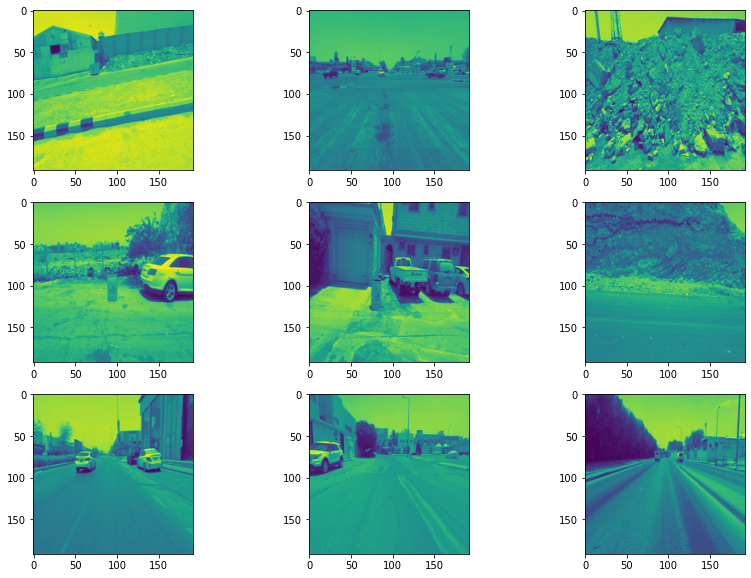

In [40]:
fig, ax = plt.subplots(3,3, figsize=(14,10))
ax[0][0].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
ax[0][1].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
ax[0][2].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
ax[1][0].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
ax[1][1].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
ax[1][2].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
ax[2][0].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
ax[2][1].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
ax[2][2].imshow(x_train_gray[random.choice(range(len(x_train_gray)))])
plt.imshow(x_train_gray[0])

In [20]:
y_encoded = LabelEncoder().fit_transform(y_train_gray)
y_categorical = to_categorical(y_encoded)
r = np.arange(x_train_gray.shape[0])
np.random.seed(42)
np.random.shuffle(r)
x_train_gray = x_train_gray[r]
y_train_gray = y_categorical[r]

In [42]:
'''y_encoded = LabelEncoder().fit_transform(y_validation_gray)
y_categorical = to_categorical(y_encoded)
r = np.arange(x_validation_gray.shape[0])
np.random.seed(42)
np.random.shuffle(r)
x_validation_gray = x_validation_gray[r]
y_validation_gray = y_categorical[r]'''

In [21]:
y_encoded = LabelEncoder().fit_transform(y_test_gray)
y_categorical = to_categorical(y_encoded)
r = np.arange(x_test_gray.shape[0])
np.random.seed(42)
np.random.shuffle(r)
x_test_gray = x_test_gray[r]
y_test_gray = y_categorical[r]

In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=15)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [34]:
from tensorflow.keras import regularizers

model_1 = models.Sequential()

model_1.add(layers.Conv1D(filters=190, kernel_size=(3), activation='relu', input_shape=x_train_gray.shape[1:],kernel_regularizer= regularizers.l2(0.000003)))
model_1.add(BatchNormalization())
model_1.add(layers.MaxPooling1D(pool_size=(2)))
model_1.add(Dropout(0.25))


model_1.add(layers.Conv1D(filters=128*2, kernel_size=(3), activation='relu',kernel_regularizer= regularizers.l2(0.0003)))
model_1.add(BatchNormalization())
model_1.add(layers.MaxPooling1D(pool_size=(2)))
model_1.add(layers.Dropout(rate=0.25))

model_1.add(layers.Conv1D(filters=128*4, kernel_size=(3), activation='relu',kernel_regularizer= regularizers.l2(0.0003)))
model_1.add(BatchNormalization())
#model_1.add(layers.MaxPooling1D(pool_size=(2)))
model_1.add(layers.Dropout(rate=0.25))

model_1.add(layers.Conv1D(filters=128*2, kernel_size=(3), activation='relu',kernel_regularizer= regularizers.l2(0.0003)))
model_1.add(BatchNormalization())
model_1.add(layers.MaxPooling1D(pool_size=(2)))
model_1.add(layers.Dropout(rate=0.25))


model_1.add(layers.Conv1D(256*3, (3), activation='relu'))
model_1.add(layers.BatchNormalization())
#model_1.add(layers.MaxPooling1D(pool_size=(2)))
model_1.add(layers.Dropout(0.25))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(512*2, activation='relu'))
model_1.add(layers.Dropout(rate=0.5))
model_1.add(BatchNormalization())
model_1.add(Dense(units=11,activation = 'softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
#model_1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 190, 190)          109630    
                                                                 
 batch_normalization_12 (Bat  (None, 190, 190)         760       
 chNormalization)                                                
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 95, 190)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 95, 190)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 93, 256)           146176    
                                                                 
 batch_normalization_13 (Bat  (None, 93, 256)         

In [35]:
history_1 = model_1.fit(x_train_gray, y_train_gray, epochs=50, validation_split= 0.20 , callbacks=callbacks)

Epoch 1/50
399/399 [==============================] - 183s 449ms/step - loss: 2.2022 - accuracy: 0.3978 - val_loss: 1.9239 - val_accuracy: 0.3962 - lr: 0.0010
Epoch 2/50
399/399 [==============================] - 190s 476ms/step - loss: 1.8238 - accuracy: 0.4572 - val_loss: 1.6335 - val_accuracy: 0.4895 - lr: 0.0010
Epoch 3/50
399/399 [==============================] - 183s 459ms/step - loss: 1.6562 - accuracy: 0.4942 - val_loss: 1.5975 - val_accuracy: 0.5092 - lr: 0.0010
Epoch 4/50
399/399 [==============================] - 144s 360ms/step - loss: 1.5538 - accuracy: 0.5150 - val_loss: 1.5967 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 5/50
399/399 [==============================] - ETA: 0s - loss: 1.4783 - accuracy: 0.5344
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
399/399 [==============================] - 140s 351ms/step - loss: 1.4783 - accuracy: 0.5344 - val_loss: 1.7662 - val_accuracy: 0.4313 - lr: 0.0010
Epoch 6/50
399/399 [========================

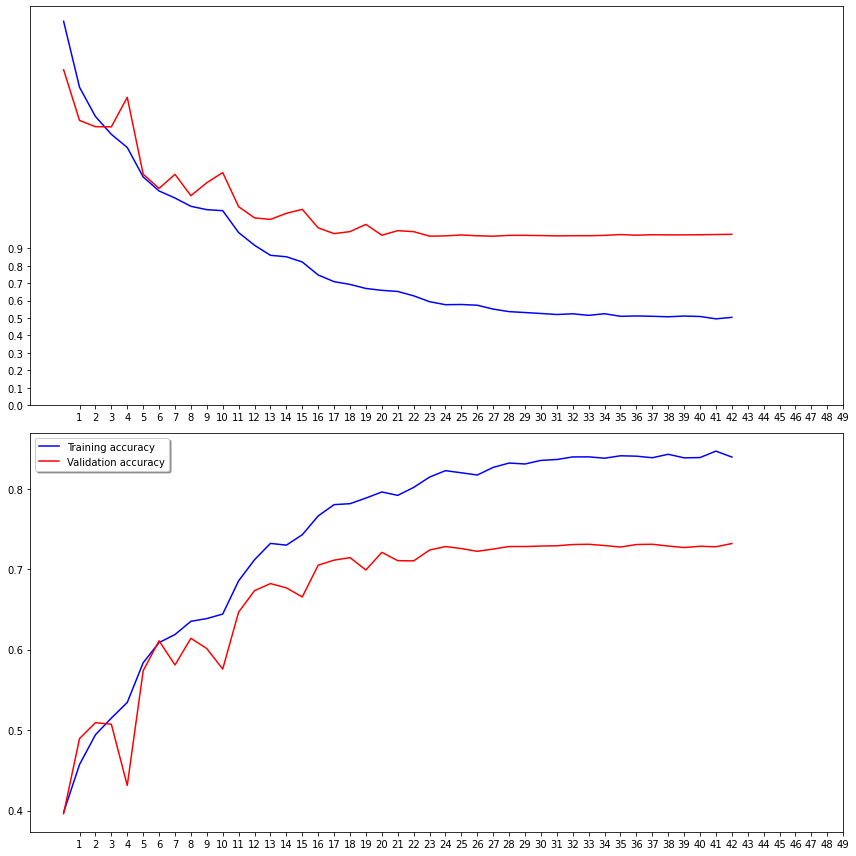

499/499 [==============================] - 25s 50ms/step - loss: 0.4852 - accuracy: 0.8568

 Train accuracy: 0.857


In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history_1.history['loss'], color='b', label="Training loss")
ax1.plot(history_1.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history_1.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history_1.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

print('\n', 'Train accuracy:', round(model_1.evaluate(x_train_gray,y_train_gray)[1],ndigits=3))

In [37]:
print('\n', 'Test accuracy:', round(model_1.evaluate(x_test_gray,y_test_gray)[1],ndigits=3))

125/125 [==============================] - 18s 138ms/step - loss: 0.9657 - accuracy: 0.7301

 Test accuracy: 0.73


In [39]:
pre=model_1.predict(x_test_gray)

125/125 [==============================] - 16s 52ms/step


In [40]:
import numpy as np
from sklearn.metrics import average_precision_score
average_precision_score(y_test_gray,pre)

0.6803645413263119

## Test

In [98]:
df_test= pd.read_csv("C:\\Users\\User\\Desktop\\smartthon\\dataset\\test.csv",sep=',',encoding='utf-8')

In [49]:
x_test=[]
for filename in range(len(df_test)):
    image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+df_test['image_path'][filename])
    grayscale = image.convert('L') #convert it into gray
    image_resized=grayscale.resize((192,192))
    x_test.append(np.array(image_resized))
    
    
    
x_test = np.array(x_test)
print('the shape of X is: ', x_test.shape)
x_test = x_test.astype('float32')/255
r = np.arange(x_test.shape[0])
np.random.seed(42)
np.random.shuffle(r)
x_test = x_test[r]

the shape of X is:  (2092, 192, 192)


In [50]:
predict = model_1.predict(x_test)

66/66 [==============================] - 5s 65ms/step


In [51]:
predict=np.argmax(predict,axis=-1)

In [52]:
sample= pd.read_csv("C:\\Users\\User\\Desktop\\smartthon\\dataset\\sample_submission.csv",sep=',',encoding='utf-8')

In [93]:
df[df['class']==1.]

,class,image_path,name,xmax,xmin,ymax,ymin
562,1.0,2bb02e9237647d20bf2188ba7b798f0a.jpg,FADED_SIGNAGE,386.0,291.0,184.0,104.0
754,1.0,386f384cbbe31cf99bb9a86958839bc1.jpg,FADED_SIGNAGE,362.0,298.0,206.0,142.0
1368,1.0,8715068a119b282973c2c12d8b1910cd.jpg,FADED_SIGNAGE,379.0,239.0,461.0,267.0
1408,1.0,032488ec5ffbb993ab79dcd797787c95.jpg,FADED_SIGNAGE,668.0,596.0,131.0,85.0
1535,1.0,556fcdfe8e20050ac47e34bb69aae7c3.jpg,FADED_SIGNAGE,444.0,275.0,286.0,62.0
...,...,...,...,...,...,...,...
18728,1.0,098b43bae190eca94ea39ee59e4cc068.jpg,FADED_SIGNAGE,365.0,288.0,208.0,133.0
18756,1.0,69b6282d7731968c153e327b4f257a11.jpg,FADED_SIGNAGE,981.0,881.0,332.0,178.0
18757,1.0,69b6282d7731968c153e327b4f257a11.jpg,FADED_SIGNAGE,904.0,788.0,327.0,171.0
19334,1.0,4a327e37237452aeb2a31cecb9cedac2.jpg,FADED_SIGNAGE,207.0,126.0,162.0,82.0


In [61]:
'''3='GARBAGE',7='BAD_BILLBOARD',8='SAND_ON_ROAD',2='POTHOLES',5='BROKEN_SIGNAGE',9='CLUTTER_SIDEWALK',4='CONSTRUCTION_ROAD'
1='FADED_SIGNAGE',6='BAD_STREETLIGHT',10='UNKEPT_FACADE''''

In [73]:
predict[0]

8

In [211]:
predict=np.argmax(predict,axis=-1)

In [101]:
name=[]
for i in predict:
    if i ==0:
        name.append('GRAFFITI')
    elif i==1:
        name.append('FADED_SIGNAGE')
    elif i==2:
        name.append('POTHOLES')
    elif i==3:
        name.append('GARBAGE')
    elif i==4:
        name.append('CONSTRUCTION_ROAD')
    elif i==5:
        name.append('BROKEN_SIGNAGE')
    elif i==6:
        name.append('BAD_STREETLIGHT')
    elif i==7:
        name.append('BAD_BILLBOARD')
    elif i==8:
        name.append('SAND_ON_ROAD')
    elif i==9:
        name.append('CLUTTER_SIDEWALK')
    elif i==10:
        name.append('UNKEPT_FACADE')
        

In [102]:
calss=[]
for i in predict:
    if i ==0:
        calss.append(0.0)
    elif i==1:
        calss.append(1.0)
    elif i==2:
        calss.append(2.0)
    elif i==3:
        calss.append(3.0)
    elif i==4:
        calss.append(4.0)
    elif i==5:
        calss.append(5.0)
    elif i==6:
        calss.append(6.0)
    elif i==7:
        calss.append(7.0)
    elif i==8:
        calss.append(8.0)
    elif i==9:
        calss.append(9.0)
    elif i==10:
        calss.append(10.0)
        

In [96]:
p=[]
for i in predict:
    p.append(192)

In [100]:
len(calss)

0

In [103]:
df_sample= pd.DataFrame({'class':calss,'image_path':df_test['image_path'],'name':name,'xmax':p,'xmin':p,'ymax':p,'ymin':p})

In [104]:
df_sample

,class,image_path,name,xmax,xmin,ymax,ymin
0,8.0,953ab1447c46ecfef67ab14629cd70c7.jpg,SAND_ON_ROAD,192,192,192,192
1,4.0,e4ddbaa7970fca225a51288ce5f7d3f9.jpg,CONSTRUCTION_ROAD,192,192,192,192
2,3.0,5b8120d69607a077b7583334be3ba18b.jpg,GARBAGE,192,192,192,192
3,3.0,138b1dc82005b4c33e4886260649d313.jpg,GARBAGE,192,192,192,192
4,4.0,0f91ec1533b845b13089f8cf4e0a36f7.jpg,CONSTRUCTION_ROAD,192,192,192,192
...,...,...,...,...,...,...,...
2087,3.0,3e7dd159466f14474a0173e9b02f512a.jpg,GARBAGE,192,192,192,192
2088,3.0,a464d4600589ddf541bed59942c0228d.jpg,GARBAGE,192,192,192,192
2089,7.0,0a490958aac3c79bb815a0f1f6825284.jpg,BAD_BILLBOARD,192,192,192,192
2090,3.0,15afe8bce6c71deed2d53f56b78b90a8.jpg,GARBAGE,192,192,192,192


In [83]:
model_1.save('model_1')

INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


In [105]:
df_sample.to_csv('sample_submission_1.csv')

In [84]:
df_pre= pd.DataFrame({'class':predict,'image_path':df_test['image_path']})

In [85]:
df_sample.to_csv('pre.csv')

## color

In [ ]:
from PIL import Image 

x_train_color=[]
y_train_color=[]
for filename in range(len(df_train)):
    image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+df_train['image_path'][filename])
    image_resized=image.resize((224,224))
    #gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #image_resized = cv2.resize(gray_img, (256,256)) # Change the number of pixels for all images
    x_train_color.append(np.array(image_resized))
    y_train_color.append(df_train['class'][filename])

y_train_color = np.array(y_train_color)
x_train_color = np.array(x_train_color)
print('the shape of X is: ', x_train_color.shape, 'and that of Y is: ', y_train_color.shape)
x_train_color = x_train_color.astype('float32')/255


#x_validation_color=[]
#y_validation_color=[]
#for filename in range(len(df_vali)):
#    image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+df_vali['image_path'][filename])
#    grayscale = image.convert('L') #convert it into gray
#    image_resized=grayscale.resize((192,192))
 #   #gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  #  #image_resized = cv2.resize(gray_img, (256,256)) # Change the number of pixels for all images
   # x_validation_color.append(np.array(image_resized))
    #y_validation_color.append(df_vali['class'][filename])

#y_validation_color = np.array(y_validation_color)
#x_validation_color = np.array(x_validation_color)
#print('the shape of X is: ', x_validation_color.shape, 'and that of Y is: ', y_validation_color.shape)
#x_validation_color = x_validation_color.astype('float32')/255


x_test_color=[]
y_test_color=[]
for filename in range(len(df_test)):
    image = Image.open("C:\\Users\\User\\Desktop\\smartthon\\dataset\\images/"+df_test['image_path'][filename])
    image_resized=image.resize((224,224))
    #gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #image_resized = cv2.resize(gray_img, (256,256)) # Change the number of pixels for all images
    x_test_color.append(np.array(image_resized))
    y_test_color.append(df_test['class'][filename])

y_test_color = np.array(y_test_color)
x_test_color = np.array(x_test_color)
print('the shape of X is: ', x_test_color.shape, 'and that of Y is: ', y_test_color.shape)
x_test_color = x_test_color.astype('float32')/255

In [88]:
new_model=tf.keras.applications.ConvNeXtXLarge(
    model_name="convnext_xlarge",
    input_shape=(224,224,3),
    classifier_activation="softmax",
)

1401457568/1401457568 [==============================] - 525s 0us/step
